# Images equalization methods 

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
# Carregar a imagem em escala de cinza
img = cv2.imread("./images.jpeg", cv2.IMREAD_GRAYSCALE).astype(np.float32)

# Definir os parâmetros
k1 = 2.0
k2 = 2.0
k3 = 3.0
# Criar a matriz de resultado
g = np.zeros_like(img, dtype=np.float32)

# Aplicar a transformação
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        f = img[i, j]
        if 0 <= f < 63:
            g[i, j] = k1 * f
        elif 63 <= f < 127:
            g[i, j] = k2 * f
        elif f >= 127  and f <= 255:
            g[i, j] = k3 * f
# Normalizar e converter para uint8
g = ((g - g.min()) * (255 / (g.max() - g.min()))).astype(np.uint8)

# Exibir a imagem
cv2.imshow("Alargamento de Contraste", g)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
img = cv2.imread("./images.jpeg", cv2.IMREAD_GRAYSCALE).astype(np.uint8)
matResult = np.zeros_like(img, dtype=np.uint8)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i, j] <= 127:
            matResult[i, j] = 0
        elif img[i, j] > 127:
            matResult[i, j] = 255


cv2.imshow("Imagem binaria", matResult)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
img = cv2.imread("./images.jpeg", cv2.IMREAD_GRAYSCALE).astype(np.uint8)
matResult = np.zeros_like(img, dtype=np.uint8)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      matResult[i,j] = 255 - img[i,j]

cv2.imshow("Imagem binaria", matResult)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
import math
epsilon = 1e-5  # Pequeno valor para evitar log(0)
scale_factor = 0.01  # Fator de escala para evitar overflow na exponencial

img1 = cv2.imread("./images.jpeg", cv2.IMREAD_GRAYSCALE).astype(np.float32)
rows, cols = img1.shape

matResultlog = np.zeros_like(img1, dtype=np.float32)
matResultraiz = np.zeros_like(img1, dtype=np.float32)
matResultexp = np.zeros_like(img1, dtype=np.float32)
matResultquadratica = np.zeros_like(img1, dtype=np.float32)

for i in range(rows):
    for j in range(cols):
      matResultquadratica[i, j] = img1[i, j] ** 2
      matResultexp[i, j] = np.exp(scale_factor * img1[i, j])
      matResultraiz[i,j] = np.sqrt(img1[i,j])
      matResultlog[i, j] = np.log(img1[i, j] + epsilon)

matResultlog = ((matResultlog - matResultlog.min()) * (255 / (matResultlog.max() - matResultlog.min()))).astype(np.uint8)
matResultexp = ((matResultexp - matResultexp.min()) * (255 / (matResultexp.max() - matResultexp.min()))).astype(np.uint8)
matResultraiz = ((matResultraiz - matResultraiz.min()) * (255 / (matResultraiz.max() - matResultraiz.min()))).astype(np.uint8)
matResultquadratica = ((matResultquadratica - matResultquadratica.min()) * (255 / (matResultquadratica.max() - matResultquadratica.min()))).astype(np.uint8)


cv2.imshow("Transformação Logarítmica", matResultlog)
cv2.imshow("Transformação Exponencial", matResultexp)
cv2.imshow("Transformação Raiz", matResultraiz)
cv2.imshow("Transformação Quadratica", matResultquadratica)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
img1 = cv2.imread("./gato.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)
rows, cols = img1.shape
mat = np.zeros_like(img1, dtype=np.float32)
epsilon = 1e-5 

for i in range(rows):
    for j in range(cols):
        mat[i,j] = 1*((img1[i,j]) ** 0.1)

mat = ((mat - mat.min()) * (255 / (mat.max() - mat.min()))).astype(np.uint8)

cv2.imshow("Gamma", mat)
cv2.waitKey(0)
cv2.destroyAllWindows()

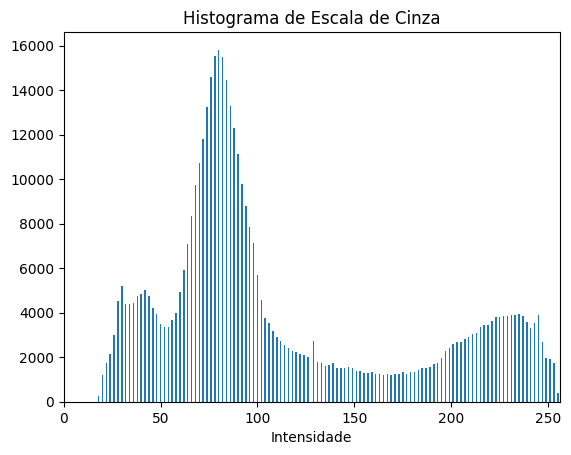

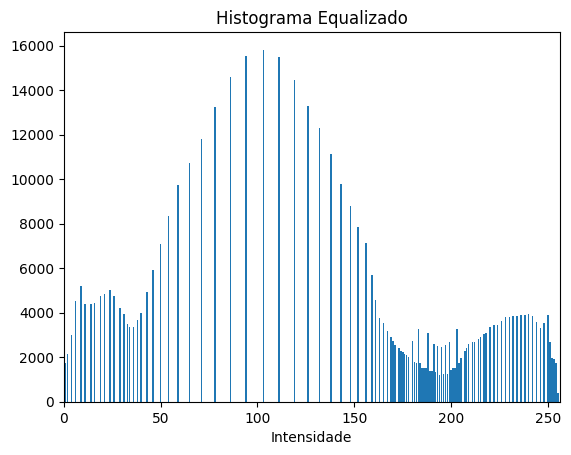

In [37]:
img1 = cv2.imread("./gato.png", cv2.IMREAD_GRAYSCALE)
img1 = img1.astype(np.float32)
rows, cols = img1.shape

histograma = cv2.calcHist([img1], [0], None, [256], [0, 256])
plt.figure()
plt.title("Histograma de Escala de Cinza")
plt.xlabel("Intensidade")
plt.bar(np.arange(256), histograma.ravel())  # Corrected: Use histograma instead of histograma.ravel()
plt.xlim([0, 256])
plt.show()



ar255 = np.zeros(256, dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        var = int(img1[i, j])  # Certifique-se de que var é um inteiro
        ar255[var] += 1


numpixel = rows * cols
prob = np.zeros(256, dtype=np.float32)
for i in range(256):
  prob[i] = ar255[i] / numpixel


acumulado = np.zeros(256, dtype=np.float32)
acumulado[0] = prob[0]
for i in range(1, 256):
  if i != 0:
    acumulado[i] = acumulado[i-1] + prob[i]

# Criar a tabela de mapeamento para a equalização
mapa = np.floor(255 * acumulado).astype(np.uint8)

# Aplicar a transformação de equalização na imagem
img_equalizada = np.zeros_like(img1, dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        img_equalizada[i, j] = mapa[int(img1[i, j])]


# Exibir o histograma da imagem equalizada
histograma_equalizado = cv2.calcHist([img_equalizada], [0], None, [256], [0, 256])
plt.figure()
plt.title("Histograma Equalizado")
plt.xlabel("Intensidade")
plt.bar(np.arange(256), histograma_equalizado.ravel())
plt.xlim([0, 256])
plt.show()

# Exibir a imagem equalizada
cv2.imshow("Imagem Equalizada", img_equalizada)
cv2.waitKey(0)
cv2.destroyAllWindows()


